In [1]:
import modules
from dataset import MyDataset

dict_keys(['multiprocessing', 'path_pretrained_models', 'execute_code', 'dataset', 'load_models', 'gpt', 'save', 'save_new_results', 'results_dir', 'use_cache', 'clear_cache', 'use_cached_codex', 'cached_codex_path', 'log_every', 'wandb', 'blip_half_precision', 'blip_v2_model_type', 'use_fixed_code', 'fixed_code_file'])
./prompts/gpt3/gpt3_qa.txt


In [2]:
dataset = MyDataset(data_path="/shared/shang/datasets/nextqa/videos/",
                    query_file="/shared/shang/datasets/nextqa/metadata/queries_2k.csv",
                    max_samples=5)

In [2]:
import sys
sys.path

['/home/shang/vidVQA',
 '/home/shang/miniconda3/envs/vid_vqa/lib/python311.zip',
 '/home/shang/miniconda3/envs/vid_vqa/lib/python3.11',
 '/home/shang/miniconda3/envs/vid_vqa/lib/python3.11/lib-dynload',
 '',
 '/home/shang/miniconda3/envs/vid_vqa/lib/python3.11/site-packages',
 '__editable__.salesforce_lavis-1.0.1.finder.__path_hook__']

In [27]:
item["video"] = item["video"][::5]

In [29]:
blip = modules.BLIPModel(gpu_number=3)
siglip = modules.SiglipModel(gpu_number=4)

2023-12-25 04:50:41.347799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 04:50:41.347840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 04:50:41.349044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 04:50:42.891179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [32]:
keyframe = siglip.forward(images=item['video'], queries=["black bird moving away from pot"])

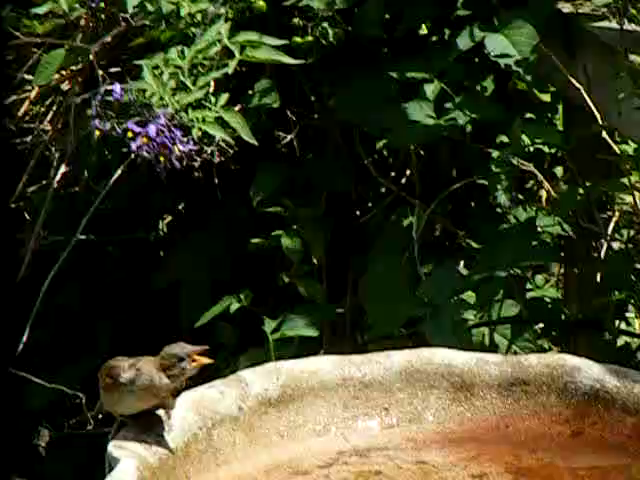

In [34]:
keyframe[0][0]

In [35]:
blip.forward(keyframe[0][0], question="Describe the scene with the most detail possible. Comment on the locations, sizes, and shapes of things as well.", task="qa")

TypeError: object of type 'Image' has no len()

In [39]:
blip.caption(keyframe[0][0])

/home/shang/miniconda3/envs/vid_vqa/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


['a bird sitting in a bird bath']

In [40]:
blip.qa(keyframe[0][0], question="Describe the scene with the most detail possible. Comment on the locations, sizes, and shapes of things as well.")

/home/shang/miniconda3/envs/vid_vqa/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


['a bird perched on a bird']